In [1]:
%cd /work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/SelectionResults_Ofs/
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
%ls

/work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/SelectionResults_Ofs


HLFV_150GeV_AdditionalTree.root    ZHTaTa_SelectionResults.root
HLFV_150GeV_SelectionResults.root  ZHWW_AdditionalTree.root
HLFV_155GeV_AdditionalTree.root    ZHWW_SelectionResults.root
HLFV_155GeV_SelectionResults.root  ZWW4l_AdditionalTree.root
HLFV_160GeV_AdditionalTree.root    ZWW4l_SelectionResults.root
HLFV_160GeV_SelectionResults.root  ZZTaTa_AdditionalTree.root
ZHTaTa_AdditionalTree.root         ZZTaTa_SelectionResults.root


In [2]:
# This creates a Python list of strings
old_file_list = glob.glob('*AdditionalTree.root')
new_file_list = []
for i in old_file_list:
    sp=i.split('_')
    if sp[0]=='HLFV':
        if int(sp[1][:-3])>=150:
            new_file_list.append(i)
    else:
        new_file_list.append(i)

print(new_file_list)

['ZHTaTa_AdditionalTree.root', 'ZZTaTa_AdditionalTree.root', 'HLFV_160GeV_AdditionalTree.root', 'ZWW4l_AdditionalTree.root', 'ZHWW_AdditionalTree.root', 'HLFV_150GeV_AdditionalTree.root', 'HLFV_155GeV_AdditionalTree.root']


In [3]:
def load_data(file_paths, tree_name):
    """
    Loads data from multiple ROOT files into a dictionary of Akward arrays.
    """
    data = {}
    for name, path in file_paths.items():
        print(f"Loading data from {path}...")
        try:
            with uproot.open(path) as file:
                tree = file[tree_name]
                data[name] = tree.arrays()
        except Exception as e:
            print(f"Error loading {path}: {e}")
            data[name] = None
    return data


# This creates a Python list of strings
file_list = glob.glob('*AdditionalTree.root')
file_paths = {}
for file_name in file_list:
    key = file_name.split('_AdditionalTree.root')[0]
    file_paths[key] = file_name


raw_data = load_data(file_paths,"Selection Results")


Loading data from ZHTaTa_AdditionalTree.root...


Loading data from ZZTaTa_AdditionalTree.root...
Loading data from HLFV_160GeV_AdditionalTree.root...
Loading data from ZWW4l_AdditionalTree.root...
Loading data from ZHWW_AdditionalTree.root...
Loading data from HLFV_150GeV_AdditionalTree.root...
Loading data from HLFV_155GeV_AdditionalTree.root...


In [4]:
raw_data["HLFV_160GeV"]["Status_06_NotZ_MassThreshold"]

<Array [0, 1, 1, 0, 0, 1, 1, ..., 1, 1, 1, 0, 0, 0, 0] type='1000000 * int32'>

In [5]:
# Pass Final Cut Statistics
for key in raw_data.keys():
    total_events = 1000000  # Assuming each dataset has 1 million events
    passed_events = ak.sum(raw_data[key]["Status_06_NotZ_MassThreshold"])
    print(f"{key}: {passed_events} out of {total_events} events passed the final cut.")

ZHTaTa: 18769 out of 1000000 events passed the final cut.
ZZTaTa: 13667 out of 1000000 events passed the final cut.
HLFV_160GeV: 526803 out of 1000000 events passed the final cut.
ZWW4l: 35285 out of 1000000 events passed the final cut.
ZHWW: 64305 out of 1000000 events passed the final cut.
HLFV_150GeV: 549305 out of 1000000 events passed the final cut.
HLFV_155GeV: 533484 out of 1000000 events passed the final cut.


In [6]:
def plot_histogram(plottype, raw_data, cutlevel, yscale, energy_plot, savepdf=False):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    signalType = ["HLFV_150GeV", "HLFV_155GeV", "HLFV_160GeV"]
    colors=sns.color_palette("flare", len(signalType))
    if energy_plot:
        bins_range = (0, 300)
        bins_num = 60
        xlabel = f"{plottype} [GeV]"
    else:
        bins_range = (0, 6)
        bins_num = 50
        xlabel = plottype
    for i,signal in enumerate(signalType):
        a=raw_data[signal]
        n_arr=a[plottype][a[cutlevel]==1]  # Apply final cut status
        sns.histplot(n_arr, bins=bins_num, binrange=bins_range, ax=ax, fill=False,
                     element="step", alpha=0.7, color=colors[i],
                     stat="count", multiple="layer", label=signal)
    sns.histplot(raw_data['ZHTaTa'][plottype][raw_data['ZHTaTa'][cutlevel]==1], bins=bins_num, binrange=bins_range, ax=ax, fill=False,
                 element="step", alpha=0.7, color='black',
                 stat="count", multiple="layer", label="ZHTaTa")
    sns.histplot(raw_data['ZHWW'][plottype][raw_data['ZHWW'][cutlevel]==1], bins=bins_num, binrange=bins_range, ax=ax, fill=False,
                 element="step", alpha=0.7, color='black', linestyle='dotted',
                 stat="count", multiple="layer", label="ZHWW")
    sns.histplot(raw_data['ZZTaTa'][plottype][raw_data['ZZTaTa'][cutlevel]==1], bins=bins_num, binrange=bins_range, ax=ax, fill=False,
                 element="step", alpha=0.7, color='black', linestyle='dashdot',
                 stat="count", multiple="layer", label="ZZTaTa")
    sns.histplot(raw_data['ZWW4l'][plottype][raw_data['ZWW4l'][cutlevel]==1], bins=bins_num, binrange=bins_range, ax=ax, fill=False,
                 element="step", alpha=0.7, color='black', linestyle='dashed',
                 stat="count", multiple="layer", label="ZWW4l")
    ax.set_title(f"{plottype} for HLFV signals")
    ax.set_xlabel(xlabel)
    ax.set_yscale(yscale)
    ax.set_ylabel("Counts")
    ax.legend()
    if savepdf:
        pdf.savefig()
    else:
        plt.show()
    plt.close()
    # plt.show()

In [7]:
# The CutLevel

# 'Status_00_NonSelection',
# 'Status_01_Lepton_PT',
# 'Status_02_FinalState_4Leptons',
# 'Status_03_Lepton_Odd',
# 'Status_04_Charge_Violation',
# 'Status_05_Z_Window',
# 'Status_06_NotZ_dR',
# 'Status_07_NotZ_MET_dPhi',
# 'Status_08_NotZ_MassThreshold',
#================================================
# The Plotting Variable

# 'NearestZ_Mass',
# 'OtherPair_Mass',
# 'Z_PairIndexSum',
# 'NotZ_dR',
# 'NotZ_dPhi',
# 'NotZ_EleMET_dPhi',
# 'NotZ_MuMET_dPhi'

In [8]:
# %cd /work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/images
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages
# from pypdf import PdfReader, PdfWriter  # pip install pypdf
# import os

# filename = 'analysis_report.pdf'
# bookmark_titles = []
# datafields=raw_data["HLFV_110GeV"].fields  # Just to check the available fields in raw_data for
# cutlist=[i for i in datafields if "Status" in i]
# plotlst=[i for i in datafields if i not in cutlist]
# # 1. Initialize the PDF file
# with PdfPages(filename) as pdf:
#     for plottype in plotlst:
#         for cutlevel in cutlist:
#             energy_plot = plottype.split('_')[-1] not in ['dR', 'dPhi', 'PairIndexSum']
#             plot_histogram(plottype, raw_data, cutlevel, 'linear', energy_plot)
#             bookmark_titles.append(f"{plottype} | {cutlevel[7:]}")

# # ==========================================
# # 3. Post-Processing: Add Bookmarks
# # ==========================================
# print("Adding bookmarks...")

# reader = PdfReader(filename)
# writer = PdfWriter()

# # Loop through pages and add them to the new writer with bookmarks
# for i, page in enumerate(reader.pages):
#     writer.add_page(page)
    
#     # Add the bookmark (Outline) if we have a title for this page
#     if i < len(bookmark_titles):
#         writer.add_outline_item(title=bookmark_titles[i], page_number=i)

# # Overwrite the file (or save as new)
# output_filename = 'analysis_report_with_bookmarks.pdf'
# with open(output_filename, "wb") as f:
#     writer.write(f)

# print(f"Saved: {output_filename}")
# %rm analysis_report.pdf

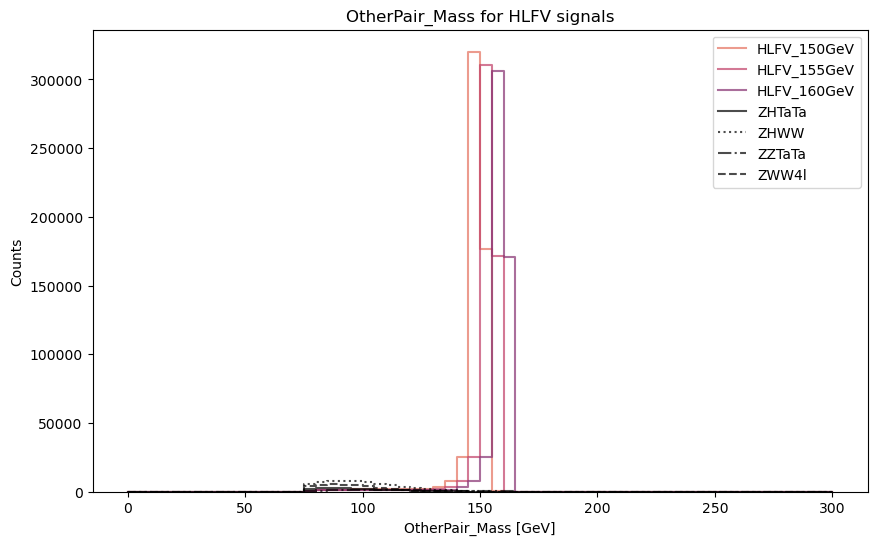

In [9]:
plot_histogram('OtherPair_Mass', raw_data, 'Status_06_NotZ_MassThreshold', 'linear', True)

In [10]:
# plot the Chart of Yields after final cut
from turtle import pd


signalType=["HLFV_150GeV", "HLFV_155GeV", "HLFV_160GeV"]
bg_xsec = {
    "ZHTaTa": 2.19e-5,
    "ZHWW": 7.84e-5,
    "ZZTaTa": 1.52e-4,
    "ZWW4l": 2.691e-6
}
for masspoint in signalType:
    this_mass = int(masspoint.split('_')[-1][:-3])
    thisMass_windows = 10
    signal_last_cut_mask = raw_data[masspoint]['Status_06_NotZ_MassThreshold'] == 1
    signal_inside_mass_window = (abs(raw_data[masspoint]['OtherPair_Mass'] - this_mass) < thisMass_windows)
    signal_final_mask = signal_last_cut_mask & signal_inside_mass_window
    signal_yield_at_1ab = ak.sum(signal_final_mask) * 1e-6  # Since we started with 1 million events
    # Backgrounds in this mass
    
    bg_yields_at_1ab = {}
    for bg in bg_xsec.keys():
        bg_last_cut_mask = raw_data[bg]['Status_06_NotZ_MassThreshold'] == 1
        bg_inside_mass_window = (abs(raw_data[bg]['OtherPair_Mass'] - this_mass) < thisMass_windows)
        bg_final_mask = bg_last_cut_mask & bg_inside_mass_window
        bg_yield = ak.sum(bg_final_mask) * bg_xsec[bg] # Scale by cross-section
        bg_yields_at_1ab[bg] = bg_yield
    # Plot (dodge) Histrogram for each mass point but signal stacked with bgs


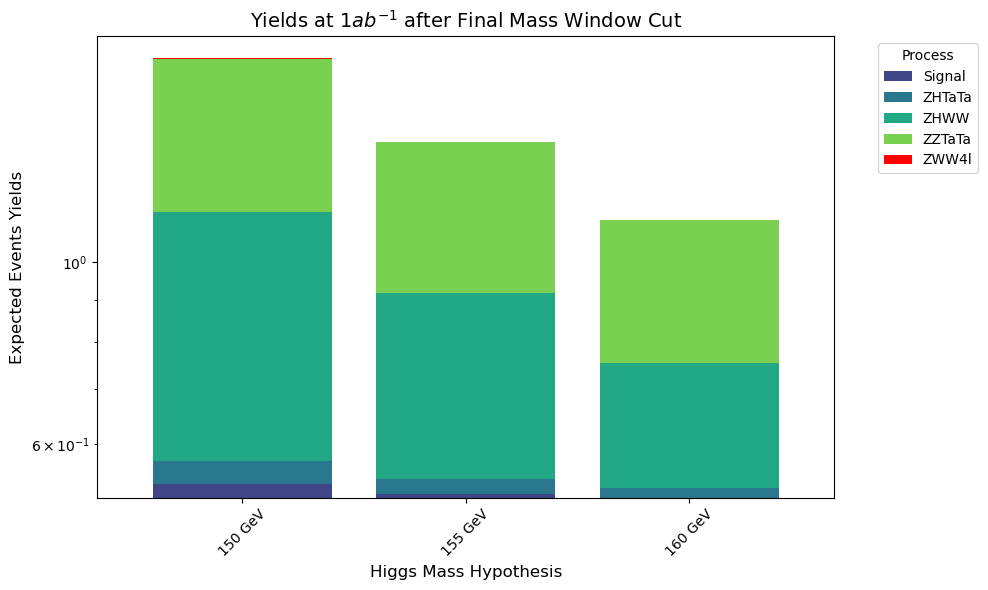

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import awkward as ak

# Initialize a list to collect results for the plot
results_list = []
passed_list = []

# Your calculation loop (updated to store data)
for masspoint in signalType:
    # Extract numerical mass for label
    this_mass = int(masspoint.split('_')[-1][:-3])
    thisMass_windows = 30
    
    # Signal Calculation
    signal_mask = (raw_data[masspoint]['Status_06_NotZ_MassThreshold'] == 1) & \
                  (abs(raw_data[masspoint]['OtherPair_Mass'] - this_mass) < thisMass_windows)
    sig_yield = ak.sum(signal_mask) * 1e-6 
    sig_passed = ak.sum(signal_mask)
    
    # Collect signal and mass for this point
    entry = {'MassPoint': f"{this_mass} GeV", 'Signal': sig_yield}
    bg_passed = {'MassPoint': f"{this_mass} GeV", 'Signal': sig_passed}
    
    
    # Background Calculations for this specific mass window
    for bg, xsec in bg_xsec.items():
        bg_mask = (raw_data[bg]['Status_06_NotZ_MassThreshold'] == 1) & \
                  (abs(raw_data[bg]['OtherPair_Mass'] - this_mass) < thisMass_windows)
        
        entry[bg] = ak.sum(bg_mask) * xsec
        bg_passed[bg] = ak.sum(bg_mask)
        
    results_list.append(entry)
    passed_list.append(bg_passed)

# 1. Create DataFrame
df_plot = pd.DataFrame(results_list).set_index('MassPoint')

# 2. Plotting
# Use a color palette that distinguishes Signal from Backgrounds
colors = sns.color_palette("viridis", len(bg_xsec)) + [(1, 0, 0)] # Reds for Signal
ax = df_plot.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, color=colors)

# 3. Styling
ax.set_title("Yields at $1 ab^{-1}$ after Final Mass Window Cut", fontsize=14)
ax.set_ylabel("Expected Events Yields", fontsize=12)
ax.set_yscale('log')
ax.set_xlabel("Higgs Mass Hypothesis", fontsize=12)
ax.legend(title="Process", bbox_to_anchor=(1.05, 1), loc='upper left')

# Log scale is highly recommended if Background >> Signal
# ax.set_yscale('log') 

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


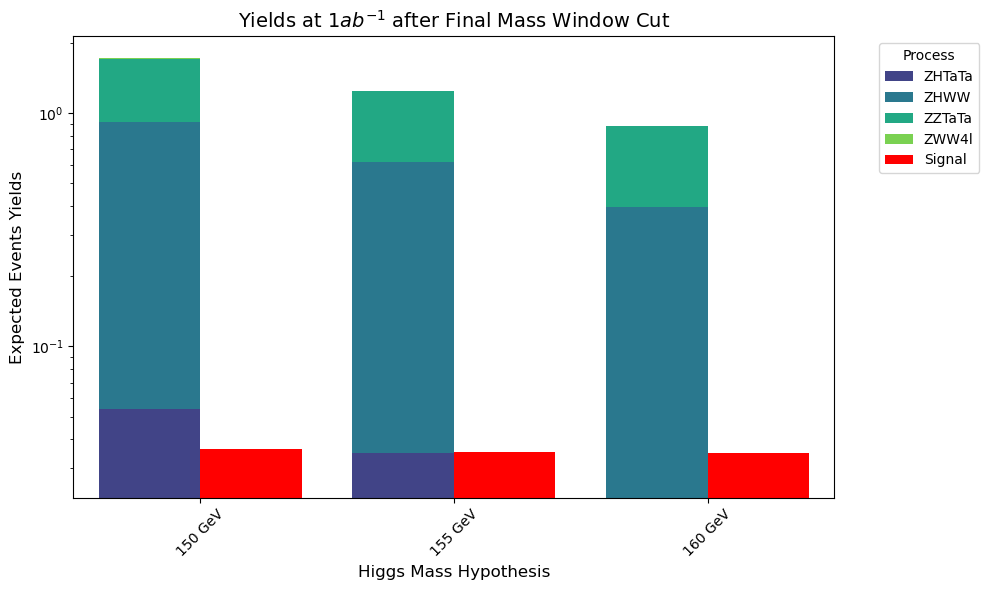

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import awkward as ak

# Initialize a list to collect results for the plot
results_list = []
passed_list = []

# Your calculation loop (updated to store data)
for masspoint in signalType:
    # Extract numerical mass for label
    this_mass = int(masspoint.split('_')[-1][:-3])
    thisMass_windows = 35
    
    # Signal Calculation
    signal_mask = (raw_data[masspoint]['Status_06_NotZ_MassThreshold'] == 1) & \
                  (abs(raw_data[masspoint]['OtherPair_Mass'] - this_mass) < thisMass_windows)
    sig_yield = ak.sum(signal_mask) * 1e-6 * 0.03363*2  # BR(H->emu)~3.363%
    sig_passed = ak.sum(signal_mask)
    
    # Collect signal and mass for this point
    entry = {'MassPoint': f"{this_mass} GeV", 'Signal': sig_yield}
    bg_passed = {'MassPoint': f"{this_mass} GeV", 'Signal': sig_passed}
    
    
    # Background Calculations for this specific mass window
    for bg, xsec in bg_xsec.items():
        bg_mask = (raw_data[bg]['Status_06_NotZ_MassThreshold'] == 1) & \
                  (abs(raw_data[bg]['OtherPair_Mass'] - this_mass) < thisMass_windows)
        
        entry[bg] = ak.sum(bg_mask) * xsec
        bg_passed[bg] = ak.sum(bg_mask)
        
    results_list.append(entry)
    passed_list.append(bg_passed)

# 1. Create DataFrame
df_plot = pd.DataFrame(results_list).set_index('MassPoint')

# 2. SPLIT the DataFrame
# Separate Signal from the Background columns
df_sig = df_plot[['Signal']]            # Only Signal column
df_bg = df_plot.drop(columns=['Signal']) # All other columns (Backgrounds)

# 3. Plotting with "Position" Shift
fig, ax = plt.subplots(figsize=(10, 6))

# A. Plot Stacked Backgrounds (Shifted to the LEFT: position=1)
# We use a distinct palette for backgrounds
bg_colors = sns.color_palette("viridis", len(df_bg.columns))
df_bg.plot(kind='bar', stacked=True, ax=ax, position=1, width=0.4, color=bg_colors)

# B. Plot Signal (Shifted to the RIGHT: position=0)
# We use a bright red for Signal to make it stand out
df_sig.plot(kind='bar', stacked=False, ax=ax, position=0, width=0.4, color=['red'], label='Signal')

# 4. Styling
ax.set_title("Yields at $1 ab^{-1}$ after Final Mass Window Cut", fontsize=14)
ax.set_ylabel("Expected Events Yields", fontsize=12)
ax.set_xlabel("Higgs Mass Hypothesis", fontsize=12)

# Fix the x-axis limits (Pandas 'position' sometimes shifts limits weirdly)
ax.set_xlim(-0.5, len(df_plot) - 0.5)

# Log scale
ax.set_yscale('log')

# Legend management (Combine legends from both plots if needed, or rely on automatic)
# Because we plotted twice, we might want to manually place the legend to avoid clutter
ax.legend(title="Process", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

def latex_sci_notifier(x):
    # Handle zero exactly as requested
    if x == 0: 
        return "0"
    # Wrap in $ delimiters so Jupyter renders it as a math formula
    return f"{x:.6f}"

# Apply formatting and add a title
styled_table = df_plot.style.format(latex_sci_notifier) \
    .set_caption("Event Yields Around Mass Point at 1 ab⁻¹ 240 GeV") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'white'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])

# Display the result
display(styled_table)

,Signal,ZHTaTa,ZHWW,ZZTaTa,ZWW4l
MassPoint,,,,,
150 GeV,0.036189,0.053743,0.863733,0.791920,0.007519
155 GeV,0.035168,0.035062,0.582277,0.621072,0.003888
160 GeV,0.034762,0.022491,0.373341,0.485184,0.001787


In [14]:
df_passed = pd.DataFrame(passed_list).set_index('MassPoint')
passed_table = df_passed.style.format() \
    .set_caption("Number of Events Around Mass Point at 1 ab⁻¹ 240 GeV") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'white'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])
display(passed_table)

,Signal,ZHTaTa,ZHWW,ZZTaTa,ZWW4l
MassPoint,,,,,
150 GeV,538041,2454,11017,5210,2794
155 GeV,522873,1601,7427,4086,1445
160 GeV,516834,1027,4762,3192,664


In [15]:
# import pandas as pd
# import awkward as ak

# # Initialize lists to store data for the table
# table_data = []
# window_mass = 20  # GeV

# signalType = [
#     "HLFV_110GeV", "HLFV_115GeV", "HLFV_120GeV", "HLFV_125GeV", 
#     "HLFV_130GeV", "HLFV_135GeV", "HLFV_140GeV", "HLFV_145GeV"
# ]
# bg_types = [
#     "ZHTaTa", "ZHWW", "ZZTaTa", "ZWW4l"
# ]

# # Map cross-sections for background (assuming pb or specific units from your code)
# xsec_map = {
#     "ZHTaTa": 21.9,
#     "ZHWW": 78.4,
#     "ZZTaTa": 152.0,
#     "ZWW4l": 2.691
# }

# for key in signalType:
#     total_events = len(raw_data[key]['Status_08_NotZ_MassThreshold'])
#     # passed_events = ak.sum(raw_data[key]['Status_08_NotZ_MassThreshold'])
#     mask_events = raw_data[key]['Status_08_NotZ_MassThreshold'] == 1
#     passed_events = ak.sum((abs(raw_data[key]["OtherPair_Mass"][mask_events]-float(key[5:-3])) < window_mass))  # Count events within mass window
#     signal_yield_value = passed_events / total_events
#     bg_yield_value = {}
#     for bg in bg_types:
#         total_events_bg = len(raw_data[bg]['Status_08_NotZ_MassThreshold'])
#         mask_events_bg = raw_data[bg]['Status_08_NotZ_MassThreshold'] == 1
#         passed_events_bg = ak.sum((abs(raw_data[bg]["OtherPair_Mass"][mask_events_bg]-float(key[5:-3])) < window_mass))  # Count events within mass window
#         # Background: Yield = (Passed / Generated) * Cross-Section * Target_Luminosity
#         # Your logic: luminosity = total/xsec -> yield = passed/lumi 
#         # This effectively calculates: Passed * (xsec / total)
#         luminosity_scaling = total_events_bg / xsec_map[bg]
#         yield_value =   passed_events_bg / luminosity_scaling
#         bg_yield_value[bg] = yield_value

#     # Append to list
#     table_data.append({
#         "Sample Type": key,
#         "Total Events": total_events,
#         "Passed Events": int(passed_events),
#         "Efficiency (%)": (passed_events / total_events) * 100,
#         "Signal Yield (1 ab⁻¹)": f"{yield_value:.4e}" if not key.startswith("HLFV") else f"{yield_value:.6f}",
#         **bg_yield_value,
#     })

# # Create DataFrame
# df_yields = pd.DataFrame(table_data)
# # Assuming 'df_yields' is the DataFrame from the previous step

# # 1. Convert the 'Yield (1 ab⁻¹)' column back to float if it was formatted as strings
# # df_yields['Yield (1 ab⁻¹)'] = pd.to_numeric(df_yields['Yield (1 ab⁻¹)'])

# # 2. Set the display precision and suppress scientific notation
# # pd.options.display.float_format = '{:.4f}'.format

# # 3. If you want to permanently change the values in the DataFrame for export:
# # df_yields['Yield (1 ab⁻¹)'] = df_yields['Yield (1 ab⁻¹)'].round(4)

# # Display the table
# # print(df_yields.to_string(index=False))
# display(df_yields)

In [47]:
# counting for each cut
standtarrdtable={}

for masspoint in ["HLFV_150GeV", "HLFV_155GeV", "HLFV_160GeV", "ZHTaTa", "ZHWW", "ZZTaTa", "ZWW4l"]:
   tmp={}
   for cutstate in ['Status_00_NonSelection',
                  'Status_01_Lepton_PT',
                  'Status_02_FinalState_4Leptons',
                  'Status_03_Lepton_Odd',
                  'Status_04_Charge_Violation',
                  'Status_05_PairSelection_offshell',
                  'Status_06_NotZ_MassThreshold']:
      tmp[cutstate]=len(ak.where(raw_data[masspoint][cutstate]==1)[0])
   standtarrdtable[masspoint]=tmp

In [48]:
pd.DataFrame.from_dict(standtarrdtable)

,HLFV_150GeV,HLFV_155GeV,HLFV_160GeV,ZHTaTa,ZHWW,ZZTaTa,ZWW4l
Status_00_NonSelection,1000000,1000000,1000000,1000000,999999,1000000,1000000
Status_01_Lepton_PT,946289,928362,914596,517383,773384,439847,869785
Status_02_FinalState_4Leptons,612615,592846,581501,282259,446290,227938,496709
Status_03_Lepton_Odd,612599,592834,581491,140980,446281,114241,247872
Status_04_Charge_Violation,612593,592825,581481,140974,446277,114234,247858
Status_05_PairSelection_offshell,550269,534377,527545,22146,73657,14779,41260
Status_06_NotZ_MassThreshold,549305,533484,526803,18769,64305,13667,35285
